# 1.0 Data Preparation

## 1.1 Data Collection

### 1.1.1 Data Description

**Context**

*   Football analytics

**Content**

*   Detailed attributes for every player registered in the latest edition of FIFA 19 database.

*   Scraping code at GitHub repo: https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019

**Acknowledgements**

*   Data scraped from https://sofifa.com/

**Inspiration**

*   Inspired from this dataset: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset



### 1.1.2 Import Libraries

In [ ]:
import pandas as pd # data preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')   # ignore warnings
pd.set_option('display.max_rows', None) # setting styles 
plt.style.use('seaborn-deep')
% matplotlib inline

### 1.1.3 Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/Y4_T1/Machine Learning/Data/'  
data = pd.read_csv(path + 'data.csv', index_col=0, parse_dates=['Joined', 'Contract Valid Until'])

### 1.1.4 Preview Dataframe

In [ ]:
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,2004-07-01,NaN,2021-01-01,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,2018-07-10,NaN,2022-01-01,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,2017-08-03,NaN,2022-01-01,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,2011-07-01,NaN,2020-01-01,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,2015-08-30,NaN,2023-01-01,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
data.tail()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,€60K,€1K,1307,Right,1.0,2.0,2.0,Medium/ Medium,Lean,No,CM,22.0,2017-05-03,NaN,2019-01-01,5'9,134lbs,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,45+2,44+2,45+2,...,45+2,45+2,45+2,45+2,45+2,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,€60K,€1K,1098,Right,1.0,2.0,2.0,Medium/ Medium,Normal,No,ST,21.0,2018-03-19,NaN,2020-01-01,6'3,170lbs,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,40+2,38+2,35+2,...,29+2,32+2,32+2,32+2,29+2,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,€60K,€1K,1189,Right,1.0,3.0,2.0,Medium/ Medium,Normal,No,ST,33.0,2017-07-01,NaN,2021-01-01,5'8,148lbs,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,44+2,44+2,38+2,...,33+2,28+2,28+2,28+2,33+2,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,1228,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,RW,34.0,2018-04-24,NaN,2019-01-01,5'10,154lbs,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,45+2,45+2,46+2,39+2,...,35+2,31+2,31+2,31+2,35+2,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,€60K,€1K,1321,Right,1.0,3.0,2.0,Medium/ Medium,Lean,No,CM,33.0,2018-10-30,NaN,2019-01-01,5'10,176lbs,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,45+2,45+2,45+2,46+2,45+2,...,46+2,47+2,47+2,47+2,46+2,41.0,34.0,46.0,48.0,30.0,43.0,40.0,34.0,44.0,51.0,57.0,55.0,55.0,51.0,63.0,43.0,62.0,47.0,60.0,32.0,56.0,42.0,34.0,49.0,33.0,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


## 1.2 Data Exploration

### 1.2.1 Describe the Data

In [ ]:
data.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.

### 1.2.2 Get Info about the Data

In [ ]:
data.info() # Check column names and datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Photo                     18207 non-null  object        
 4   Nationality               18207 non-null  object        
 5   Flag                      18207 non-null  object        
 6   Overall                   18207 non-null  int64         
 7   Potential                 18207 non-null  int64         
 8   Club                      17966 non-null  object        
 9   Club Logo                 18207 non-null  object        
 10  Value                     18207 non-null  object        
 11  Wage                      18207 non-null  object        
 12  Special           

### 1.2.3 Check Datatypes

In [ ]:
data.dtypes.value_counts()

object            43
float64           38
int64              5
datetime64[ns]     2
dtype: int64

### 1.2.4 Check Shape

In [ ]:
print('There are {} rows and {} columns in the dataset'.format(data.shape[0], data.shape[1]))

There are 18207 rows and 88 columns in the dataset


### 1.2.5 Check Missing Values

In [ ]:
data.isnull().values.any()

True

In [ ]:
data.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

### 1.2.6 Check Duplicates

In [ ]:
data.duplicated().any()

False

## 1.3 Data Visualization

* build some high-level intuition of some of the relationships between different variables using plotting techniques

### 1.3.1 Numerical Data

#### 1.3.1.1 Age

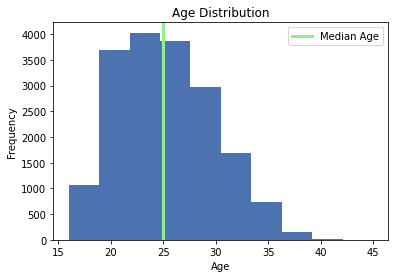

In [ ]:
plt.hist(data.Age)
plt.axvline(data.Age.median(), color='lightgreen', label="Median Age", lw=3)

plt.xlabel("Age")
plt.ylabel("Frequency")

plt.title("Age Distribution")
plt.legend(loc='upper right')

plt.show()

#### 1.3.1.2 Rankings

##### Overall Ranking

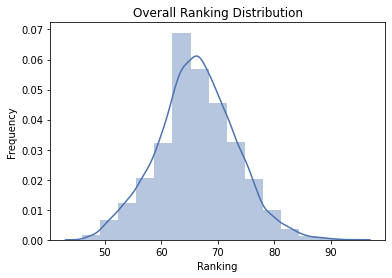

In [ ]:
sns.distplot(data.Overall, bins=15)

plt.xlabel("Ranking")
plt.ylabel("Frequency")

plt.title("Overall Ranking Distribution")

plt.show()

##### Overall vs. Potential

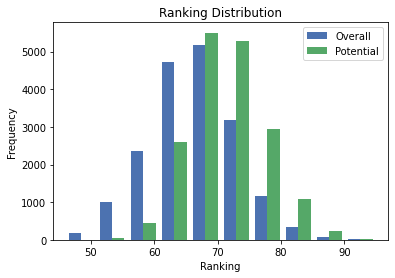

In [ ]:
x = data.Overall
y = data.Potential

plt.hist([x, y], label=['Overall', 'Potential'])

plt.xlabel("Ranking")
plt.ylabel("Frequency")

plt.title("Ranking Distribution")
plt.legend(loc='upper right')

plt.show()

#### 1.3.1.3 Ratings

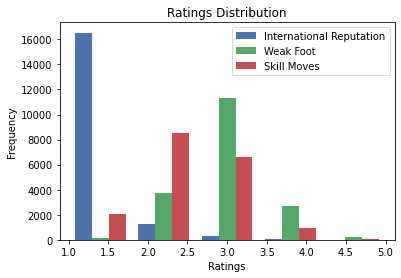

In [ ]:
x = data['International Reputation']
y = data['Weak Foot']
z = data['Skill Moves']

plt.hist([x, y, z], label=['International Reputation', 'Weak Foot','Skill Moves'],bins=5)

plt.xlabel("Ratings")
plt.ylabel("Frequency")

plt.title("Ratings Distribution")
plt.legend()

plt.show()

#### 1.3.1.4 Specialties

In [ ]:
start = data.columns.get_loc('Crossing')
stop = data.columns.get_loc('GKReflexes')

specialties_data = data.iloc[:,start:stop+1]
specialties_data.shape

(18207, 34)

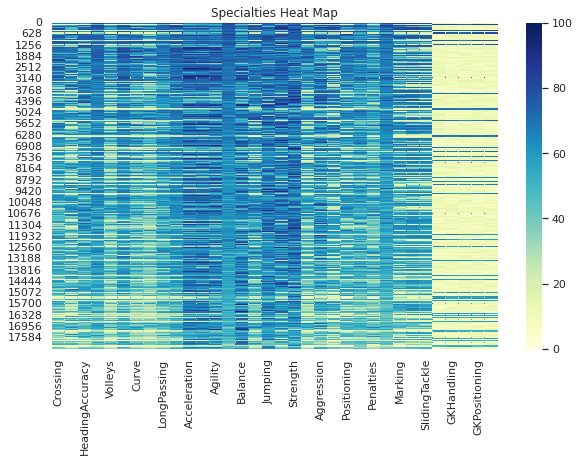

In [ ]:
sns.set(rc = {'figure.figsize':(10,6)})

ax = plt.axes()
sns.heatmap(specialties_data, vmin=0, vmax=100, cmap="YlGnBu", xticklabels=2)

ax.set_title('Specialties Heat Map')
plt.show()

#### 1.3.1.5 Top Players

In [ ]:
top_players = data.nlargest(10, 'Overall')

##### Rankings

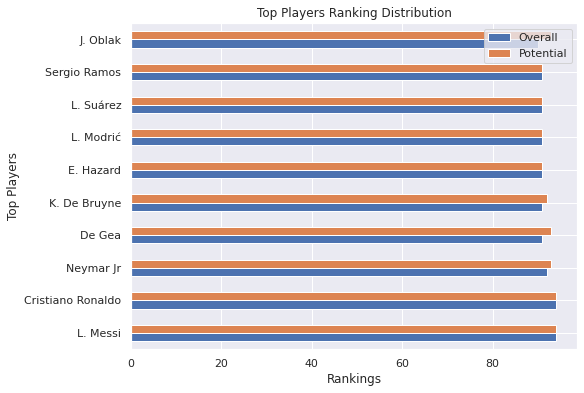

In [ ]:
top_players.plot.barh(y=['Overall', 'Potential'], x='Name', figsize=(8, 6))

plt.xlabel("Rankings")
plt.ylabel("Top Players")

plt.title("Top Players Ranking Distribution")
plt.legend(loc='upper right')

plt.show()

##### Ratings

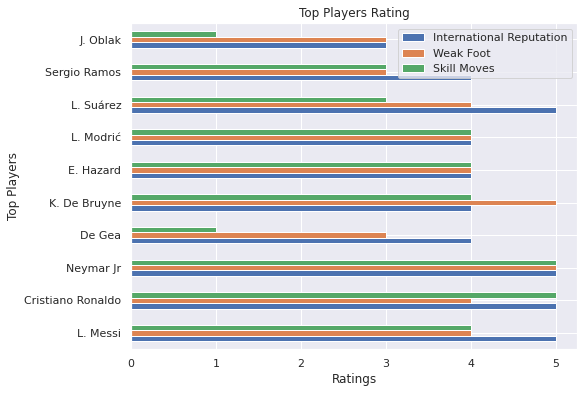

In [ ]:
top_players.plot.barh(y=['International Reputation', 'Weak Foot','Skill Moves'], x='Name', figsize=(8, 6))

plt.xlabel("Ratings")
plt.ylabel("Top Players")

plt.title("Top Players Rating")
plt.legend()

plt.show()

##### Specialties

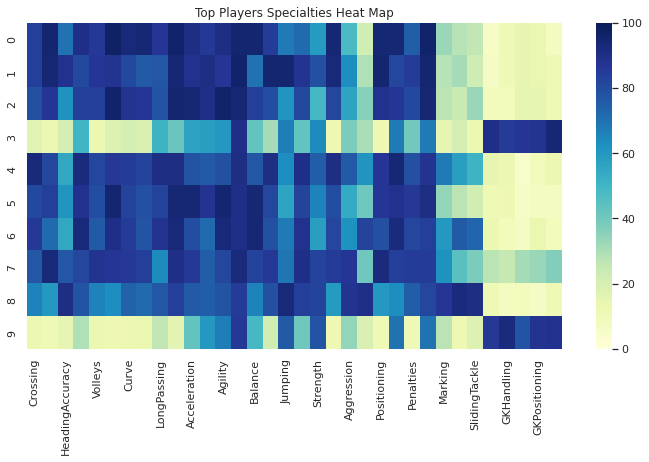

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)})

specialties_data = top_players.iloc[:,start:stop+1]
ax = plt.axes()
sns.heatmap(specialties_data, vmin=0, vmax=100, cmap="YlGnBu", xticklabels=2)

ax.set_title('Top Players Specialties Heat Map')
plt.show()

#### 1.3.1.6 Bottom Players

In [ ]:
bottom_players = data.nsmallest(10, 'Overall')

##### Rankings

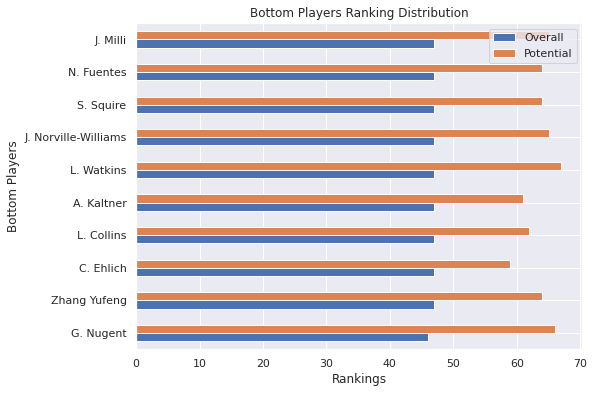

In [ ]:
bottom_players.plot.barh(y=['Overall', 'Potential'], x='Name', figsize=(8, 6))

plt.xlabel("Rankings")
plt.ylabel("Bottom Players")

plt.title("Bottom Players Ranking Distribution")
plt.legend(loc='upper right')

plt.show()

##### Ratings

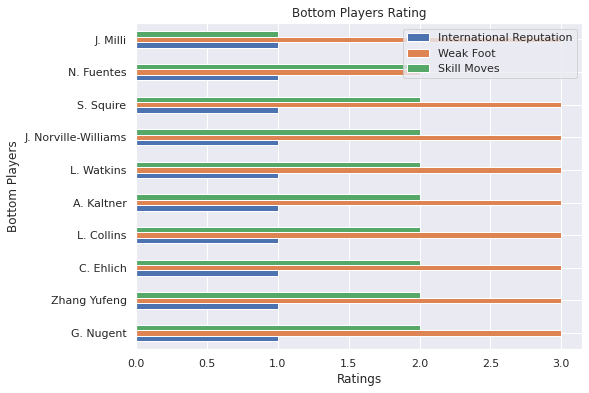

In [ ]:
bottom_players.plot.barh(y=['International Reputation', 'Weak Foot','Skill Moves'], x='Name', figsize=(8, 6))

plt.xlabel("Ratings")
plt.ylabel("Bottom Players")

plt.title("Bottom Players Rating")
plt.legend()

plt.show()

##### Specialties

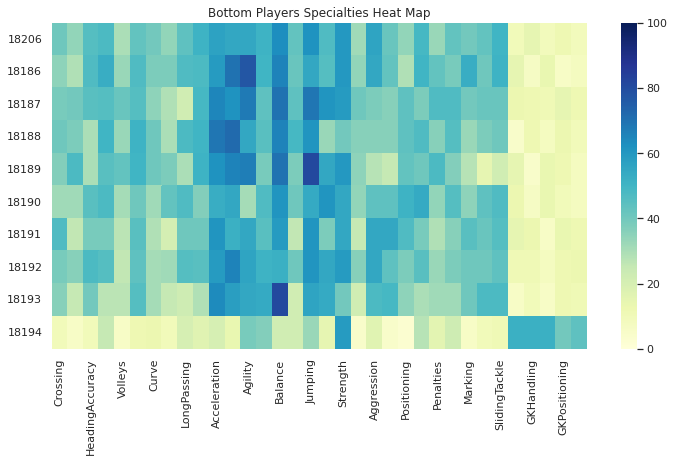

In [ ]:
sns.set(rc = {'figure.figsize':(12,6)})

specialties_data = bottom_players.iloc[:,start:stop+1]
ax = plt.axes()
sns.heatmap(specialties_data, vmin=0, vmax=100, cmap="YlGnBu", xticklabels=2)

ax.set_title('Bottom Players Specialties Heat Map')
plt.show()

### 1.3.2 Objects

#### 1.3.2.1 Value Counts

##### Nationality

In [ ]:
data.Nationality.value_counts().head(10)

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

In [ ]:
data.Nationality.value_counts().count()

164

##### Club

In [ ]:
data.Club.value_counts().head(10)

Atlético Madrid        33
RC Celta               33
CD Leganés             33
Liverpool              33
Arsenal                33
Manchester City        33
Newcastle United       33
Eintracht Frankfurt    33
FC Barcelona           33
Chelsea                33
Name: Club, dtype: int64

In [ ]:
data.Club.value_counts().count()

651

In [ ]:
data.Club.value_counts().min()

18

In [ ]:
data.Club.value_counts(ascending=True).head(10)

Derry City             18
Limerick FC            19
Sligo Rovers           19
Ceará Sporting Club    20
Fluminense             20
Internacional          20
Paraná                 20
Cruzeiro               20
Vitória                20
Bahia                  20
Name: Club, dtype: int64

##### Preferred Foot

In [ ]:
data['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

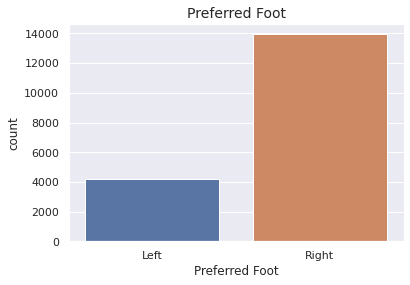

In [ ]:
sns.set(rc = {'figure.figsize':(6,4)})
sns.countplot(data['Preferred Foot'])
plt.title('Preferred Foot', fontdict={'size':14});

##### Body Type

In [ ]:
data['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Courtois                   1
Akinfenwa                  1
Neymar                     1
Name: Body Type, dtype: int64

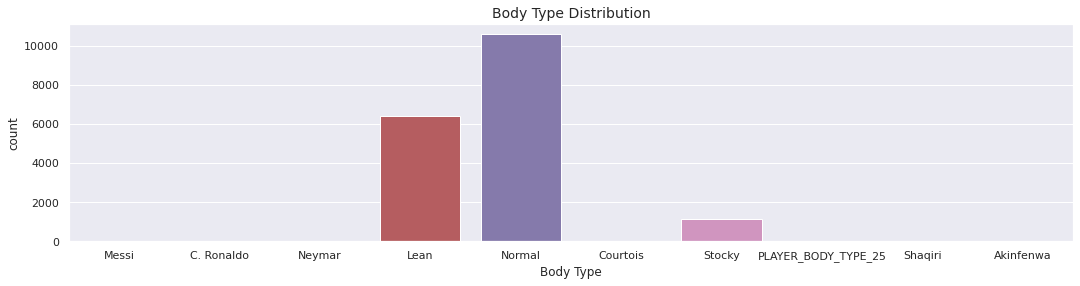

In [ ]:
plt.figure(figsize=(18,4))
sns.countplot(data['Body Type'])
plt.title('Body Type Distribution', fontdict={'size':14});

##### Work Rate

In [ ]:
data['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

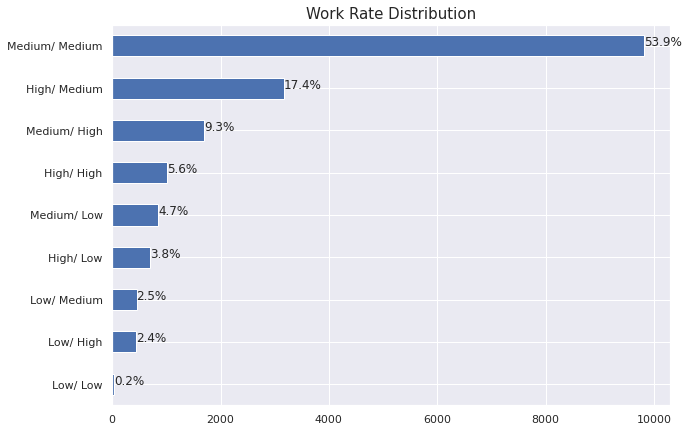

In [ ]:
# Work Rate distribution 
ax = data['Work Rate'].value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Work Rate Distribution', fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/data.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

##### Position

In [ ]:
data['Position'].value_counts().head(10)

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
Name: Position, dtype: int64

In [ ]:
data['Position'].value_counts().count()

27

In [ ]:
data['Position'].value_counts(ascending=True).head(10)

LF      15
RF      16
RAM     21
LAM     21
CF      74
LWB     78
RWB     87
RS     203
LS     207
LDM    243
Name: Position, dtype: int64

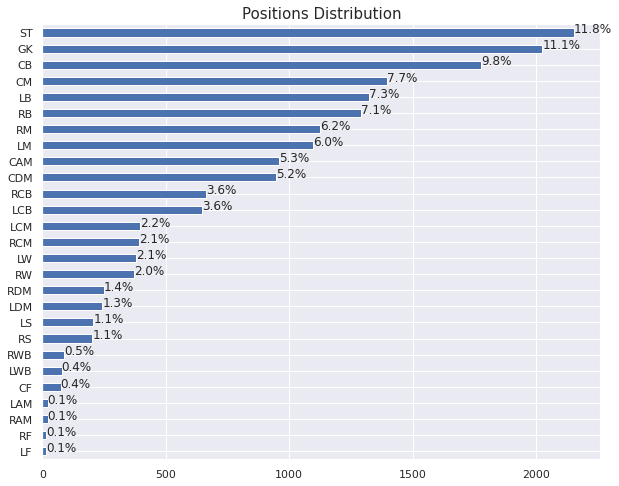

In [ ]:
# Positions distribution 
ax = data['Position'].value_counts().sort_values().plot(kind = 'barh', figsize=(10,8))
plt.title('Positions Distribution', fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/data.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

### 1.3.3 DateTime

In [ ]:
import datetime as dt
pd_crosstab = pd.crosstab(data.Joined.dt.year, data.Overall, margins=True) # previewing cross tab of Joined and Overall
pd_crosstab.tail(8)

Overall,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,94,All
Joined,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012.0,0,0,0,0,0,0,0,0,0,0,2,1,6,4,7,4,17,16,30,19,24,23,25,19,26,17,16,10,10,15,9,7,8,2,2,3,4,4,0,0,3,2,3,0,0,2,0,0,340
2013.0,0,0,1,1,0,1,1,0,4,3,0,3,5,10,11,10,16,20,31,32,34,25,36,36,20,25,22,22,12,13,11,10,4,4,7,4,3,2,7,2,3,2,4,1,0,0,0,0,458
2014.0,0,0,0,0,0,0,4,2,7,8,8,12,15,18,23,30,31,52,56,51,58,39,47,43,50,30,36,23,19,28,36,26,12,10,8,9,6,6,3,2,1,3,0,2,3,1,0,0,818
2015.0,0,1,0,2,2,3,3,9,13,11,19,23,32,32,45,52,55,78,81,78,85,84,69,86,65,46,51,54,44,48,31,26,17,20,14,9,17,8,9,8,4,0,0,1,0,1,0,0,1336
2016.0,0,1,2,2,5,14,24,24,18,35,46,56,51,57,93,106,117,117,128,120,143,132,106,124,117,101,85,75,80,69,37,42,23,25,17,19,13,11,2,1,3,3,1,1,0,0,0,0,2246
2017.0,0,6,4,9,26,31,43,59,64,48,93,91,113,135,161,187,227,256,274,257,271,278,244,203,202,180,174,116,123,93,82,76,36,47,32,18,17,11,9,6,2,1,1,0,0,0,1,0,4307
2018.0,1,12,24,22,67,74,81,98,133,148,154,178,199,222,258,269,289,349,381,350,410,404,350,315,295,270,254,219,171,155,116,73,49,46,40,20,27,19,10,7,4,0,4,1,0,0,0,1,6569
All,1,20,32,36,100,123,159,193,240,254,324,373,425,486,604,666,765,922,1014,933,1055,1019,926,865,800,708,673,544,474,446,340,280,154,162,134,90,94,68,45,32,22,13,15,11,5,6,1,2,16654


In [ ]:
start = pd_crosstab.columns.get_loc(46)
stop = pd_crosstab.columns.get_loc(94)

In [ ]:
pd_crosstab.shape

(23, 49)

In [ ]:
df = pd.DataFrame(pd_crosstab.iloc[13:22,start:stop+1])

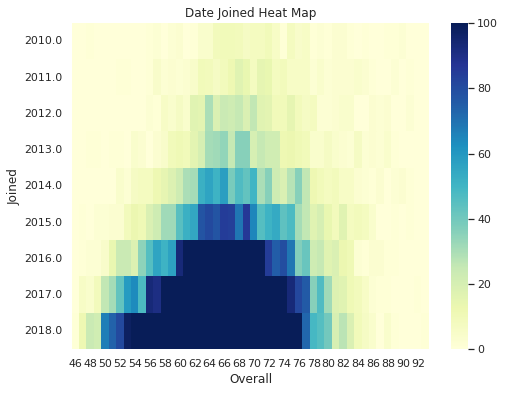

In [ ]:
sns.set(rc = {'figure.figsize':(8,6)})

ax = plt.axes()
sns.heatmap(df, vmin=0, vmax=100, cmap="YlGnBu", xticklabels=2)

ax.set_title('Date Joined Heat Map')
plt.show()

## 1.4 Feature Extraction

### 1.4.1 Data Types

#### 1.4.1.1 Convert Currency to Float

In [ ]:
def strip(value):
    if value==np.nan:
        new_value=float(0)
    else:
        value=value.replace('€','')
        if value[-1]=='K':
            new_value=float(value.replace('K',''))*1000
        else:
            new_value=float(value.replace('M',''))*1000000
    return new_value

In [ ]:
data.Value= data.Value.apply(lambda x : strip(x))
data.Wage= data.Wage.apply(lambda x : strip(x))
data['Release Clause']= data['Release Clause'].fillna("0").apply(lambda x : strip(x))

In [ ]:
data[['Value','Wage','Release Clause']].head(3)

,Value,Wage,Release Clause
0,110500000.0,565000.0,226500000.0
1,77000000.0,405000.0,127100000.0
2,118500000.0,290000.0,228100000.0


#### 1.4.1.2 Convert Dates to Year and Days

In [ ]:
data.Joined= data.Joined.dt.year.apply(lambda x : x)

In [ ]:
data.Joined.head(3)

0    2004.0
1    2018.0
2    2017.0
Name: Joined, dtype: float64

In [ ]:
from datetime import datetime
data['Days_to_Contract_Clo'] = data['Contract Valid Until'] - datetime.now()
data['Days_to_Contract_Clo'] = data['Days_to_Contract_Clo'].dt.days

In [ ]:
data['Days_to_Contract_Clo'].head(3)

0   -304.0
1     61.0
2     61.0
Name: Days_to_Contract_Clo, dtype: float64

#### 1.4.1.3 Convert Height and Weight

In [ ]:
data.Height= data.Height.fillna("0'0").apply(lambda x: round(int(x.split("'")[1])/12+int(x.split("'")[0]),2))
data.Weight= data.Weight.fillna('0').apply(lambda x: x.replace('lbs', '')).astype(float)

In [ ]:
data[['Height','Weight']].head(3)

,Height,Weight
0,5.58,159.0
1,6.17,183.0
2,5.75,150.0


### 1.4.2 Data Encoding

* Convert non-numeric features to numeric



In [ ]:
data_obj_cols = [col for col in data.columns if  data[col].dtype=='O']

In [ ]:
data[data_obj_cols].head(3)

,Name,Photo,Nationality,Flag,Club,Club Logo,Preferred Foot,Work Rate,Body Type,Real Face,Position,Loaned From,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,L. Messi,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,Left,Medium/ Medium,Messi,Yes,RF,NaN,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,Cristiano Ronaldo,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,Right,High/ Low,C. Ronaldo,Yes,ST,NaN,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,Right,High/ Medium,Neymar,Yes,LW,NaN,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3


#### 1.4.2.1 Positions

In [ ]:
pos_cols = data_obj_cols[12:]

In [ ]:
for col in pos_cols:
  data[col]=data[col].str[:-2] 
  data[col]=data[col].astype(float)

In [ ]:
data[pos_cols].head(3)

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0
1,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0
2,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0


#### 1.4.2.2 Categorical Data

In [ ]:
data_cat_cols = ['Nationality','Club','Preferred Foot','Work Rate','Body Type','Position']

for col in data.columns:
  if col in data_cat_cols:
    data[col] = data[col].astype('category')

In [ ]:
data[data_cat_cols].head(3)

,Nationality,Club,Preferred Foot,Work Rate,Body Type,Position
0,Argentina,FC Barcelona,Left,Medium/ Medium,Messi,RF
1,Portugal,Juventus,Right,High/ Low,C. Ronaldo,ST
2,Brazil,Paris Saint-Germain,Right,High/ Medium,Neymar,LW


##### **Target Encoding** 

- calculate the mean of the target variable for each category and replace the category variable with the mean value


In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

# Create target encoding object
encoder=ce.TargetEncoder(cols='Nationality')

#Fit and Transform Train Data
data_encoded=encoder.fit_transform(data['Nationality'],data['Overall'])

In [ ]:
data['Nationality_Target_Encoding']=data_encoded

In [ ]:
# Create target encoding object
encoder=ce.TargetEncoder(cols='Club')

#Fit and Transform Train Data
data_encoded=encoder.fit_transform(data['Club'],data['Overall'])

In [ ]:
data['Club_Target_Encoding']=data_encoded

In [ ]:
#store target encoded values
nationalities={'Nationality':data.Nationality,'Target_Encoding':data.Nationality_Target_Encoding}
clubs={'Club':data.Club,'Target_Encoding':data.Club_Target_Encoding}

In [ ]:
nationalities=pd.DataFrame(nationalities)
clubs=pd.DataFrame(clubs)

##### **One Hot Encoding**

In [ ]:
data['Preferred Foot'].isnull().sum()

48

In [ ]:
encoder=ce.OneHotEncoder(cols='Preferred Foot',handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Fit and transform Data
data = encoder.fit_transform(data)

In [ ]:
data['Body Type'].isnull().sum()

48

In [ ]:
data['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Shaqiri                    1
PLAYER_BODY_TYPE_25        1
Neymar                     1
Messi                      1
Courtois                   1
C. Ronaldo                 1
Akinfenwa                  1
Name: Body Type, dtype: int64

In [ ]:
list=['Shaqiri','PLAYER_BODY_TYPE_25','Neymar','Messi','Courtois','C. Ronaldo','Akinfenwa']
data['Body Type'].loc[data['Body Type'].isin(list)]='Normal'

In [ ]:
data['Body Type'].value_counts()

Normal                 10602
Lean                    6417
Stocky                  1140
Shaqiri                    0
PLAYER_BODY_TYPE_25        0
Neymar                     0
Messi                      0
Courtois                   0
C. Ronaldo                 0
Akinfenwa                  0
Name: Body Type, dtype: int64

In [ ]:
encoder=ce.OneHotEncoder(cols='Body Type',handle_unknown='return_nan',return_df=True,use_cat_names=True)
#Fit and transform Data
data = encoder.fit_transform(data)

##### **Label Encoding/Ordinal Encoding**

In [ ]:
data['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

In [ ]:
data['Work Rate'].isnull().sum()

48

In [ ]:
encoder=ce.OrdinalEncoder(cols=['Work Rate'],return_df=True,
                           mapping=[{'col':'Work Rate',
'mapping':{np.nan:0,'Low/ Low':1,'Low/ Medium':2,'Low/ High':3,'Medium/ Low':4,'Medium/ Medium':5,'Medium/ High':6,'High/ Low':7,'High/ Medium':8,'High/ High':9}}])

In [ ]:
#fit and transform train data 
data = encoder.fit_transform(data)

##### **Base N Encoding**

In [ ]:
data['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [ ]:
# to handle the dimensionality we use a larger base such as 4 or 8
encoder= ce.BaseNEncoder(cols=['Position'],return_df=True,base=4)
data=encoder.fit_transform(data)

### 1.4.3 Drop Irrelevant Data Entries

In [ ]:
cols=['ID', 'Name','Photo','Nationality','Flag', 'Club','Club Logo', 'Real Face','Loaned From', 'Jersey Number','Contract Valid Until','Preferred Foot_nan','Body Type_nan']
data=data.drop(cols, axis=1)

### 1.4.4 Filling Missing Values

In [ ]:
null_values= data.isnull().sum()
missing_val_cols= [i for i in null_values[null_values>0].index]

In [ ]:
for col in missing_val_cols:
    data[col]= data[col].fillna(data[col].mean())

In [ ]:
data.isnull().any().any()

False

In [ ]:
data.shape

(18207, 85)

# 2.0 Feature Selection

### 2.1 Pearson Correlation

* To reduce the number of variables and treat multicollinearity

In [ ]:
correlations = data.corr()

In [ ]:
# calculate correlation with target variable
correlation_with_target = correlations.sort_values('Overall')['Overall']
print('Most Negative:\n')
display(correlation_with_target.head(10)) # most negative
print('\nMost Positive:\n')
display(correlation_with_target.tail(10))

Most Negative:



Joined                 -0.167241
Body Type_Lean         -0.075881
Position_0             -0.040696
Preferred Foot_Right   -0.040684
GKKicking              -0.029358
GKDiving               -0.025924
GKHandling             -0.025049
GKReflexes             -0.023264
GKPositioning          -0.017666
Position_2             -0.005830
Name: Overall, dtype: float64


Most Positive:



RS                      0.619736
Value                   0.627085
Club_Target_Encoding    0.635346
Potential               0.660939
RCM                     0.714725
CM                      0.714725
LCM                     0.714725
Composure               0.727293
Reactions               0.849622
Overall                 1.000000
Name: Overall, dtype: float64

#### 2.1.1 Collinear Features

* Threshold of 0.7: because pairwise correlation higher than 0.7 may lead to unstable estimates and multicollinearity

In [ ]:
threshold = 0.7
correlated_pairs = {}

# Iterate through the columns
for col in correlations:
    # Find correlations above the threshold
    above_threshold_vars = [x for x in correlations.index[correlations[col] > threshold] if x != col]
    correlated_pairs[col] = above_threshold_vars

In [ ]:
print('Value -> ', correlated_pairs['Value'])
print('Reactions -> ', correlated_pairs['Reactions'])

Value ->  ['Wage', 'Release Clause']
Reactions ->  ['Overall']


#### 2.1.2 Drop Correlated Features

* To avoid multicollinearity in the data

In [ ]:
# Upper triangle of correlations
upper = correlations.where(np.triu(np.ones(correlations.shape), k=1).astype(np.bool))

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to drop' % (len(to_drop)))

There are 58 columns to drop


In [ ]:
# columns to drop
print('Old shape: ', data.shape)
corr_data = data.drop(columns = to_drop)
print('New shape: ', corr_data.shape)

Old shape:  (18207, 85)
New shape:  (18207, 27)


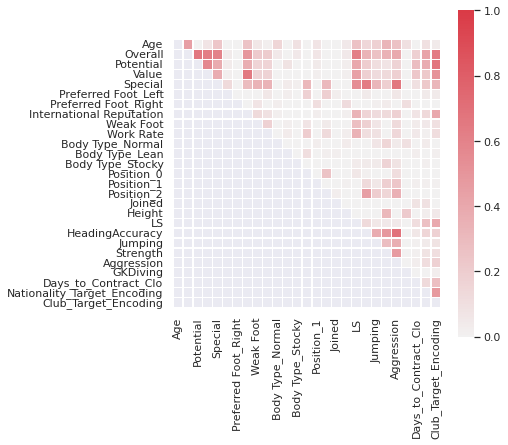

In [ ]:
# plotting correlations outcome
dataViz = corr_data
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(6,6)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=0.2, vmin=0, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

In [ ]:
print(str(len(corr_data.columns)), 'selected features')

27 selected features


### 2.2 Chi-square Features

* select variables with the maximum chi-squared values

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X = data.copy()
del X['Overall']
y = data['Overall']

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=30)

chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_features = X.loc[:,chi_support].columns.tolist()

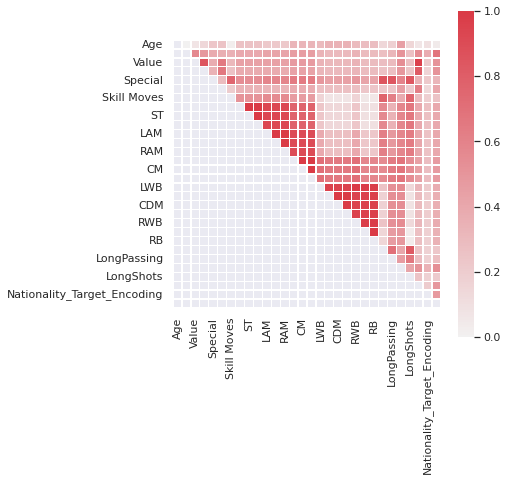

In [ ]:
# plotting correlations outcome
dataViz = data[chi_features]
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(6,6)) 
corr = dataViz.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=0.2, vmin=0, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

In [ ]:
print(str(len(chi_features)), 'selected features')

30 selected features


## 2.3 Create a Validation Dataset

In [ ]:
X_corr = data[corr_data.columns].drop('Overall',axis=1).values
X_chi = X[chi_features].values

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_corr, y, test_size=0.20, random_state=1)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_chi, y, test_size=0.20, random_state=1)
print(X1_train.shape, X1_test.shape)
print(X2_train.shape, X2_test.shape)

(14565, 26) (3642, 26)
(14565, 30) (3642, 30)


## 2.4 Build Models

XGBoost, GradientBoostClassifier, RandomForest

In [ ]:
!pip install xgboost

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

XGB = XGBRegressor()
GBR = GradientBoostingRegressor()
RFR = RandomForestRegressor()

### Subset 1: Pearson Correlation Features

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

results1 = []
models = [XGB, GBR, RFR] 
names = ['XGB','GBR','RFR']

print('Mean MSE Scores\n')
i=0
while i< len(models):
  # define model evaluation method
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  # evaluate model
  scores = cross_val_score(models[i], X1_train, Y1_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
  # force scores to be positive
  scores = absolute(scores)
  results1.append(scores)
  print('%s: %.3f (%.3f)' % (names[i], scores.mean(), scores.std()))
  i+=1

Mean MSE Scores

XGB: 0.495 (0.031)
GBR: 0.492 (0.031)
RFR: 0.239 (0.029)


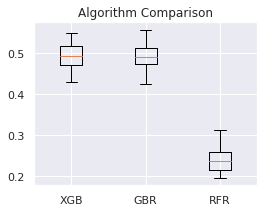

In [ ]:
# Compare Algorithms
plt.figure(figsize=(4,3))
plt.boxplot(results1, labels=names)
plt.title('Algorithm Comparison')
plt.show()

### Subset 2: Chi-square Features

In [ ]:
RFR = RandomForestRegressor()
print('Mean MSE Score\n')
score = cross_val_score(RFR, X2_train, Y2_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
results2 = absolute(score)
print('RFR : %.3f (%.3f)' % (results2.mean(), results2.std()))

Mean MSE Score

RFR : 0.222 (0.008)


## 2.5 Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE

# Create a recursive feature elimination filter with Random Forest Regressor 
rfe_selector = RFE(estimator=RandomForestRegressor(), n_features_to_select=30, step=10, verbose=5) #select 30 features
rfe1 = rfe_selector.fit(X_norm, y)

Fitting estimator with 84 features.
Fitting estimator with 74 features.
Fitting estimator with 64 features.
Fitting estimator with 54 features.
Fitting estimator with 44 features.
Fitting estimator with 34 features.


In [ ]:
rfe_support = rfe_selector.get_support()
rfe_features = X.loc[:,rfe_support].columns.tolist()

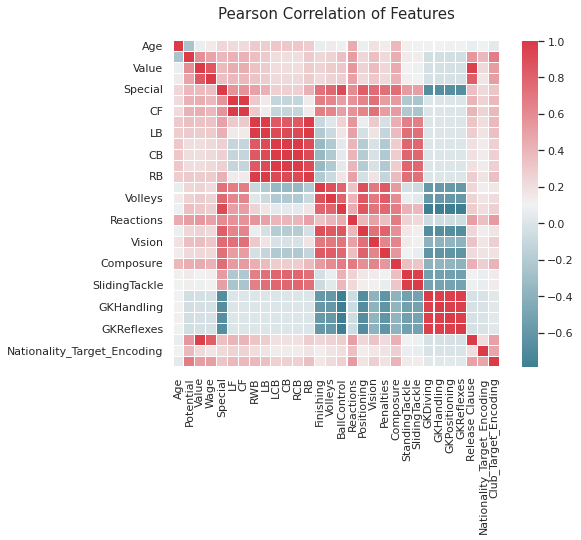

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[rfe_features].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=cmap, linecolor='white')

In [ ]:
print(str(len(rfe_features)), 'selected features')

30 selected features


### Subset 3: RFE Features

In [ ]:
X_rfe = X[rfe_features].values
print(X_rfe.shape)

(18207, 30)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape)

(14565, 30) (3642, 30)


In [ ]:
RFR = RandomForestRegressor()
print('Mean MSE Score\n')
score = cross_val_score(RFR, X_train, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
results3 = absolute(score)
print('RFR : %.3f (%.3f)' % (results3.mean(), results3.std()))

Mean MSE Score

RFR : 0.222 (0.005)


## 2.6 Select From Model

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

embeded_rf_selector = SelectFromModel(LinearRegression(), max_features=30)
embeded_rf_selector.fit(X_norm, y)

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=30, norm_order=1, prefit=False, threshold=None)

In [ ]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_features = X.loc[:,embeded_rf_support].columns.tolist()

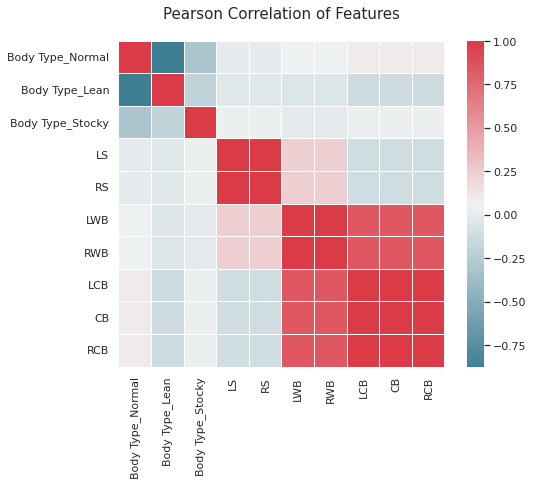

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data[embeded_rf_features].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=cmap, linecolor='white')

In [ ]:
print(str(len(embeded_rf_features)), 'selected features')

10 selected features


### Subset 4: SelectFromModel Features

In [ ]:
X_rf = X[embeded_rf_features].values
print(X_rf.shape)

(18207, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape)

(14565, 10) (3642, 10)


In [ ]:
RFR = RandomForestRegressor()
print('Mean MSE Score\n')
score = cross_val_score(RFR, X_train, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
results4 = absolute(score)
print('RFR : %.3f (%.3f)' % (results4.mean(), results4.std()))

Mean MSE Score

RFR : 8.481 (0.239)


* Using too small number of features seems to perform poorly

## 2.7 Top Features

In [ ]:
# use top features
feature_name = X.columns
corr_support = [True if i in corr_data.columns else False for i in feature_name]

feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Corr':corr_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'RFR':embeded_rf_support})

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
feature_selection_df = feature_selection_df.sort_values(['Total'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head()

,Feature,Corr,Chi-2,RFE,RFR,Total
1,Age,True,True,True,False,3
2,LS,True,True,False,True,3
3,Nationality_Target_Encoding,True,True,True,False,3
4,Potential,True,True,True,False,3
5,RWB,False,True,True,True,3


In [ ]:
X_bf = X[feature_selection_df.Feature.head(30)].values
print(X_bf.shape)

(18207, 30)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bf, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape)

(14565, 30) (3642, 30)


In [ ]:
RFR = RandomForestRegressor()
print('Mean MSE Score\n')
score = cross_val_score(RFR, X_train, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
results5 = absolute(score)
print('RFR : %.3f (%.3f)' % (results5.mean(), results5.std()))

Mean MSE Score

RFR : 0.223 (0.005)


## 2.8 Feature Importance

In [ ]:
# use feature importance ranking 
names1 = data[corr_data.columns].drop('Overall',axis=1).columns
names2 = X[chi_features].columns
names3 = X[rfe_features].columns
names4 = X[embeded_rf_features].columns

In [ ]:
reg=RandomForestRegressor(n_estimators=10,random_state=123) #Build a random forest regressor

reg.fit(X[names1], y) #fit independent and dependent variables
importances1 = reg.feature_importances_

reg.fit(X[chi_features], y) 
importances2 = reg.feature_importances_

reg.fit(X[rfe_features], y) 
importances3 = reg.feature_importances_

reg.fit(X[embeded_rf_features], y) 
importances4 = reg.feature_importances_

In [ ]:
importances = [importances1,importances2,importances3,importances4]
feat_names = [names1,names2,names3,names4]

indices = []
i=0
while i<len(importances):
  indices.append(np.argsort(importances[i])[::-1])
  i+=1

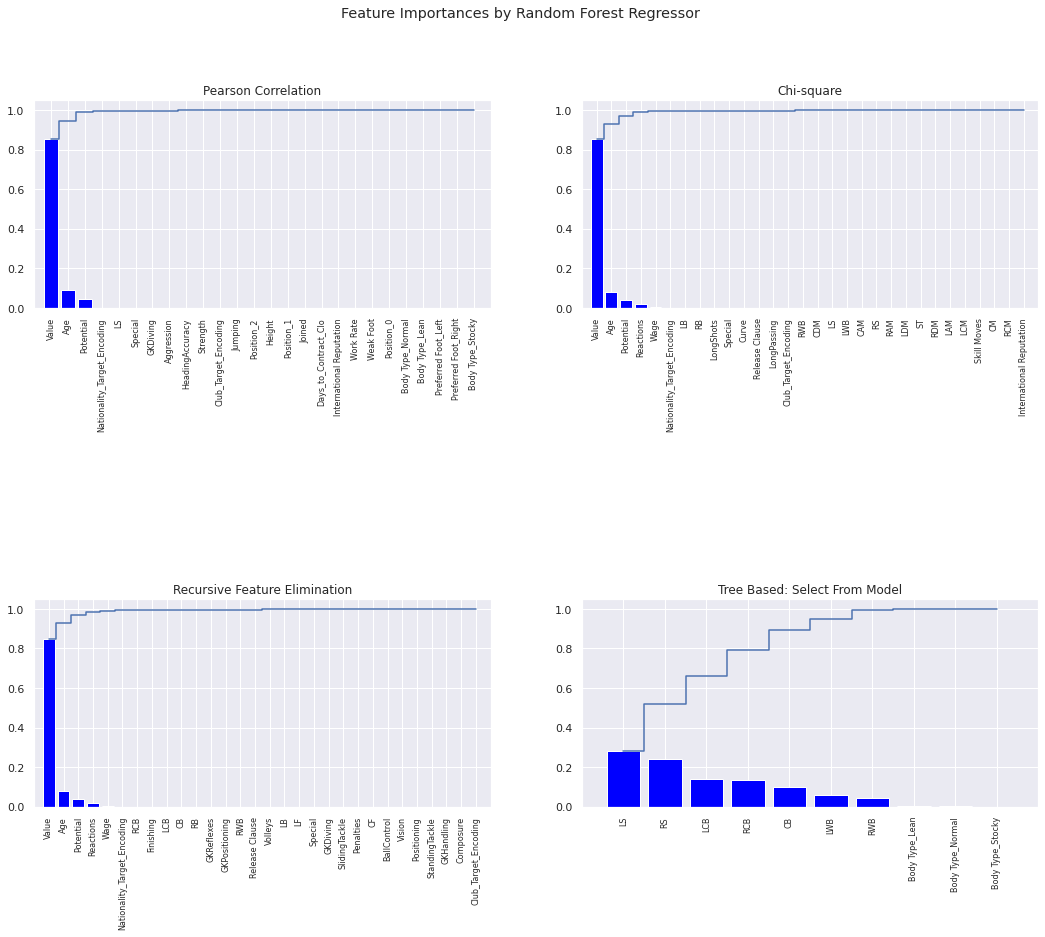

In [ ]:
fig = plt.figure(figsize=(18,13))
i=0
j=1
titles=["Pearson Correlation","Chi-square","Recursive Feature Elimination","Tree Based: Select From Model"]
while i<4:
  if j == 3:
    j+=2
  plt.subplot(3,2,j)
  plt.title(titles[i])
  plt.bar(range(len(indices[i])), importances[i][indices[i]], color='blue',  align="center")
  plt.step(range(len(indices[i])), np.cumsum(importances[i][indices[i]]), where='mid', label='Cumulative')
  plt.xticks(range(len(indices[i])), feat_names[i][indices[i]], rotation='vertical',fontsize=8)
  plt.xlim([-1, len(indices[i])])
  i+=1
  j+=1

plt.suptitle("Feature Importances by Random Forest Regressor")
plt.show()

In [ ]:
i=0
cols=['Corr','Chi','RFE','RFR']
while i<4:
  d = {'Feature': feat_names[i], cols[i]: importances[i]}
  if i==0:
    df=pd.DataFrame(data=d)
  temp=pd.DataFrame(data=d)
  df=pd.merge(df, temp, how='outer')
  i+=1

In [ ]:
df['Average']=df.mean(numeric_only=True, axis=1)

In [ ]:
best_features_df=df.sort_values(by='Average', ascending=False)

In [ ]:
best_features_df.head()

,Feature,Corr,Chi,RFE,RFR,Average
2,Value,0.855948,0.851288,0.850171,NaN,0.852469
29,RS,NaN,0.000182,NaN,0.241116,0.120649
17,LS,0.001073,0.000218,NaN,0.280205,0.093832
0,Age,0.088897,0.078983,0.078580,NaN,0.082153
50,LCB,NaN,NaN,0.000582,0.138532,0.069557


In [ ]:
X_fi = X[best_features_df.Feature.head(30)].values
print(X_fi.shape)

(18207, 30)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fi, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape)

(14565, 30) (3642, 30)


In [ ]:
RFR = RandomForestRegressor()
print('Mean MSE Score\n')
score = cross_val_score(RFR, X_train, y_train, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
results6 = absolute(score)
print('RFR : %.3f (%.3f)' % (results6.mean(), results6.std()))

Mean MSE Score

RFR : 0.225 (0.007)


# 3.0 Model Build

## 3.1 Training Data

In [ ]:
# get lowest MSE score
results1 = results1[2]
data={'Feature Subset':['Corr','Chi','RFE','SFM','Top Features','Feature Importance'],
      'MSE Score':[results1.mean(),results2.mean(),results3.mean(),results4.mean(),results5.mean(),results6.mean()]}
df=pd.DataFrame(data)
lowest_mse = df.sort_values(by='MSE Score')
lowest_mse

,Feature Subset,MSE Score
1,Chi,0.222198
2,RFE,0.222382
4,Top Features,0.223450
5,Feature Importance,0.225132
0,Corr,0.239404
3,SFM,8.480644


In [ ]:
# append subsets' feature names
names5 = feature_selection_df.Feature.head(30).tolist()
feat_names.append(names5)
names6 = best_features_df.Feature.head(30).tolist()
feat_names.append(names6)

In [ ]:
X = X[feat_names[lowest_mse.index[0]]].values
print(X.shape)

(18207, 30)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape, X_test.shape)

(14565, 30) (3642, 30)


## 3.2 Feature Scaling

We know our dataset is not yet a scaled value, for instance the Value field has values in the range of millions while Wage has values in range of thousands. It would be beneficial to scale our data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Transform to approximately normal distribution
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3.3 Base Model

In [ ]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [ ]:
# Mean Squared Error (MSE).
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test,y_pred))

# Root Mean Squared Error (RMSE).
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test,y_pred))

# Root Mean Squared Log Error(RMSLE)
print("\nRMSLE:",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

# R Squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2:",r2)

# Adjusted R Squared
n=40
k=2
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adj R2:",adj_r2_score)

MSE: 0.14654203734211974
RMSE: 0.38280809466640037
MAE: 0.22246293245469537

RMSLE: -0.9602214736854253
R2: 0.9968996097388383
Adj R2: 0.9967320210760728


In [ ]:
from pprint import pprint

print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## 3.4 Hyperparameter Tuning

### 3.4.1 Random Search with Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# search across 30 different combinations, use all available cores
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 107.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rfr_random.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 2000}

#### Evaluate Random Search

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.2425 degrees.
Accuracy = 99.62%.


In [ ]:
best_random = rfr_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Average Error: 0.2203 degrees.
Accuracy = 99.65%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.03%.


### 3.4.2 Grid Search with Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rfr = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 39.0min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 52.8min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

#### Evaluate Grid Search

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.6398 degrees.
Accuracy = 99.01%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.61%.


* grid search seems to lower the accuracy of our model so we'll use hyperparameters from random search

## 3.5 Model Performance

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

  """
  Generate a simple plot of the test and traning learning curve. 
  
  Parameters 
  ---------- 
  
  estimator : object type that implements the "fit" and "predict" methods  
  title : string Title for the chart. 
  X : Training vector, where n_samples is the number of samples and n_features is the number of features. 
  y : Target relative to X for regression; 
  ylim : Defines minimum and maximum yvalues plotted. 
  cv : If an integer is passed, it is the number of folds (defaults to 3). 
  n_jobs : integer, optional Number of jobs to run in parallel (default 1).

  """
  plt.figure() 
  plt.title(title)

  if ylim is not None: 
    plt.ylim(*ylim) 

  plt.xlabel("Training examples") 
  plt.ylabel("Score") 

  train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) 

  train_scores_mean = np.mean(train_scores, axis=1) 
  train_scores_std = np.std(train_scores, axis=1) 
  test_scores_mean = np.mean(test_scores, axis=1) 
  test_scores_std = np.std(test_scores, axis=1) 

  plt.grid() 

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r") 
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g") 

  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score") 

  plt.legend(loc="best") 

  return plt

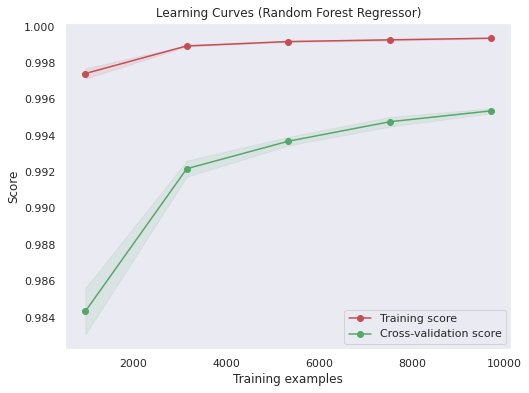

In [ ]:
title = "Learning Curves (Random Forest Regressor)" 
estimator = RandomForestRegressor(
    bootstrap=rfr_random.best_params_.get('bootstrap'), 
    max_depth=rfr_random.best_params_.get('max_depth'), 
    max_features=rfr_random.best_params_.get('max_features'), 
    min_samples_leaf=rfr_random.best_params_.get('min_samples_leaf'), 
    min_samples_split=rfr_random.best_params_.get('min_samples_split'),
    n_estimators=rfr_random.best_params_.get('n_estimators')
) 
plot_learning_curve(estimator, title, X_train, y_train, cv=3, n_jobs=-1) 
plt.show()

* The model performs fairly well with high scores from both training and cross-validation. However, there is some overfitting (gap between train and cv curves). Let's see if the overfitting can be reduced if we use the shuffling method

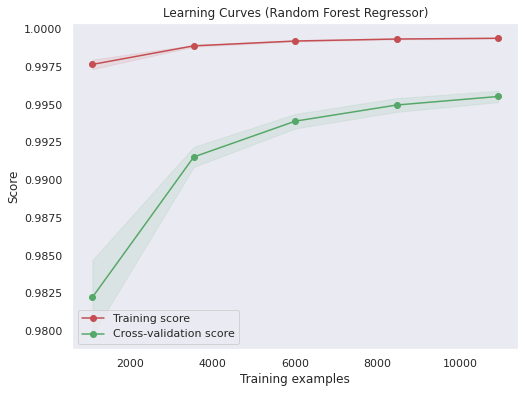

In [ ]:
from sklearn.model_selection import ShuffleSplit

# randomly shuffles and selects Train and CV sets for each iteration 
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

title = "Learning Curves (Random Forest Regressor)" 
estimator = RandomForestRegressor(
    bootstrap=rfr_random.best_params_.get('bootstrap'), 
    max_depth=rfr_random.best_params_.get('max_depth'), 
    max_features=rfr_random.best_params_.get('max_features'), 
    min_samples_leaf=rfr_random.best_params_.get('min_samples_leaf'), 
    min_samples_split=rfr_random.best_params_.get('min_samples_split'),
    n_estimators=rfr_random.best_params_.get('n_estimators')
) 
plot_learning_curve(estimator, title, X_train, y_train, cv=cv, n_jobs=-1) 
plt.show()

* There seems to be a slight improvement on overfitting and the overall score of the cross-validation curve, 
though ShuffleSplit makes this model considerably slower

# 4.0 Make Predictions

In [ ]:
# Make predictions on test dataset
model = RandomForestRegressor(
    bootstrap=rfr_random.best_params_.get('bootstrap'), 
    max_depth=rfr_random.best_params_.get('max_depth'), 
    max_features=rfr_random.best_params_.get('max_features'), 
    min_samples_leaf=rfr_random.best_params_.get('min_samples_leaf'), 
    min_samples_split=rfr_random.best_params_.get('min_samples_split'),
    n_estimators=rfr_random.best_params_.get('n_estimators')
) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 5.0 Model Evalutation

In [ ]:
# Mean Squared Error (MSE).
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test,y_pred))

# Root Mean Squared Error (RMSE).
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

# Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test,y_pred))

MSE: 0.14577240808941344
RMSE: 0.3818015297106776
MAE: 0.2198828405673815


* An MSE score of 0.14, reduced from 0.22,
* An RMSE score between 0.2 and 0.5, and
* An MAE score of 0.21, slightly better than the MAE for the naive model of 0.22:

gives a relatively good performance for this model 

# 6.0 Model Deployment

In [ ]:
# features
print(feat_names[lowest_mse.index[0]].tolist())

['Age', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Skill Moves', 'LS', 'ST', 'RS', 'LAM', 'CAM', 'RAM', 'LCM', 'CM', 'RCM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'RB', 'Curve', 'LongPassing', 'Reactions', 'LongShots', 'Release Clause', 'Nationality_Target_Encoding', 'Club_Target_Encoding']


In [ ]:
# sample test set
X_test=[34, 70, 94, 78,110000000, 2000, 79, 86, 200000000, 90, 56, 78, 67, 89, 690000, 87, 69, 98, 78, 56, 57, 89, 89, 1, 0, 0, 87, 90,"Argentina","Crewe Alexandra"]

In [ ]:
nationalities=nationalities.groupby(['Nationality']).mean()
clubs=clubs.groupby(['Club']).mean()

In [ ]:
def te_nationalities():
  if X_test[28] in nationalities.index:
    X_test[28]=int(nationalities.loc[X_test[28]])

In [ ]:
def te_clubs():
  if X_test[29] in clubs.index:
    X_test[29]=int(clubs.loc[X_test[29]])

In [ ]:
te_nationalities=te_nationalities()
te_clubs=te_clubs()

In [ ]:
# list of nationalities
nationalities_list=nationalities.index.tolist()
# list of clubs
clubs_list=clubs.index.tolist()

In [ ]:
X_test=np.array(X_test).reshape(1,-1)
X_test.shape

(1, 30)

In [ ]:
y_pred = model.predict(X_test)
y_pred[0]

91.5075

In [ ]:
import pickle

In [ ]:
data = {"model": model, "nationalities":nationalities, "clubs":clubs, "nationalities_list":nationalities_list, "clubs_list":clubs_list, "te_nationalities": te_nationalities, "te_clubs": te_clubs}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
nationalities = data["nationalities"]
clubs = data["clubs"]
nationalities_list = data["nationalities_list"]
clubs_list = data["clubs_list"]
te_nationalities = data["te_nationalities"]
te_clubs = data["te_clubs"]

In [ ]:
y_pred = regressor_loaded.predict(X_test)
y_pred

array([91.5075])

In [ ]:
!cp saved_steps.pkl "/content/drive/My Drive/Y4_T1/Machine Learning/"